In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from cmath import nan
import pandas as pd
from os import path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit
from Plot import fit_sigm
from GM_analysisPlateE4 import *

#Data reading

In [6]:
#opening the data

df = pd.read_excel(path.join("E4","Plates.xlsx"),
                  engine="openpyxl",
                        index_col=0,
                              dtype={'date': str} # we just specify the type of coumn for date
            
            ) # first columns are the indexed column


In [25]:
#cleaning the data 
df2 = df.copy()
df2 = df2[df2["Radius"]>25]
df2 = df2[df2["Radius"]<500]
#df2 = df2[df2["Viability"]<1]


In [26]:
# adding drugs
df2 = addDataDrugsPlates(df2)

In [27]:

# splitting and adding R0
df3 =  addR02(df2)

dates:['210504' '210505' '210506' '210507' '210510']


In [28]:
# splitting 
dfEto,dfCisPlat = splitPlate(df3)


#Plotting

[ 0.97386056 10.70126346  7.71492264  0.31310063]
[0.9959009  1.98215864 7.12552395 0.28777053]
[ 0.97203843  0.94649931 16.01550865  0.29373946]
[ 0.71849132  0.45271796 49.85431835  0.34225852]


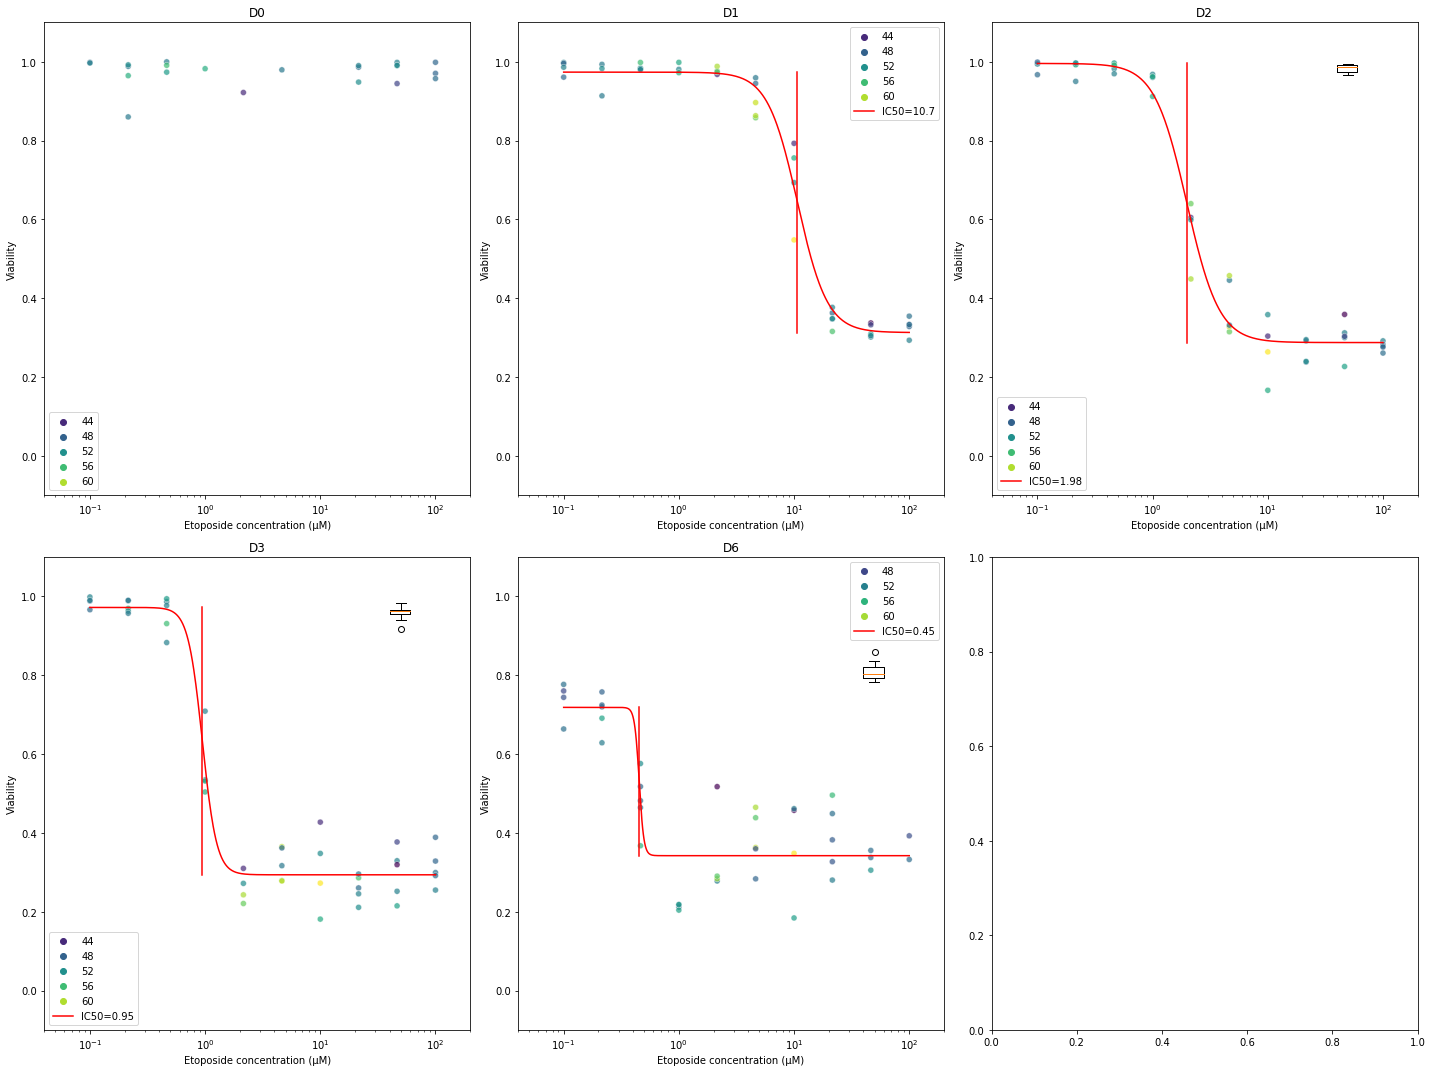

In [42]:
plot_Plate(dfEto,drugName="Eto",xlab="Etoposide concentration (µM)",
                  save=True,
                    fileName = "20221011_PlateEtoposide_withFit_fromExcel",
                        printFit=True)

[ 0.96778039 12.60050589 10.74866476  0.30902335]
[0.98190427 1.82182971 5.72398113 0.20443518]
[0.97126694 0.71389584 9.58045998 0.1845107 ]
[0.7522533  0.56848842 7.93434266 0.23672687]


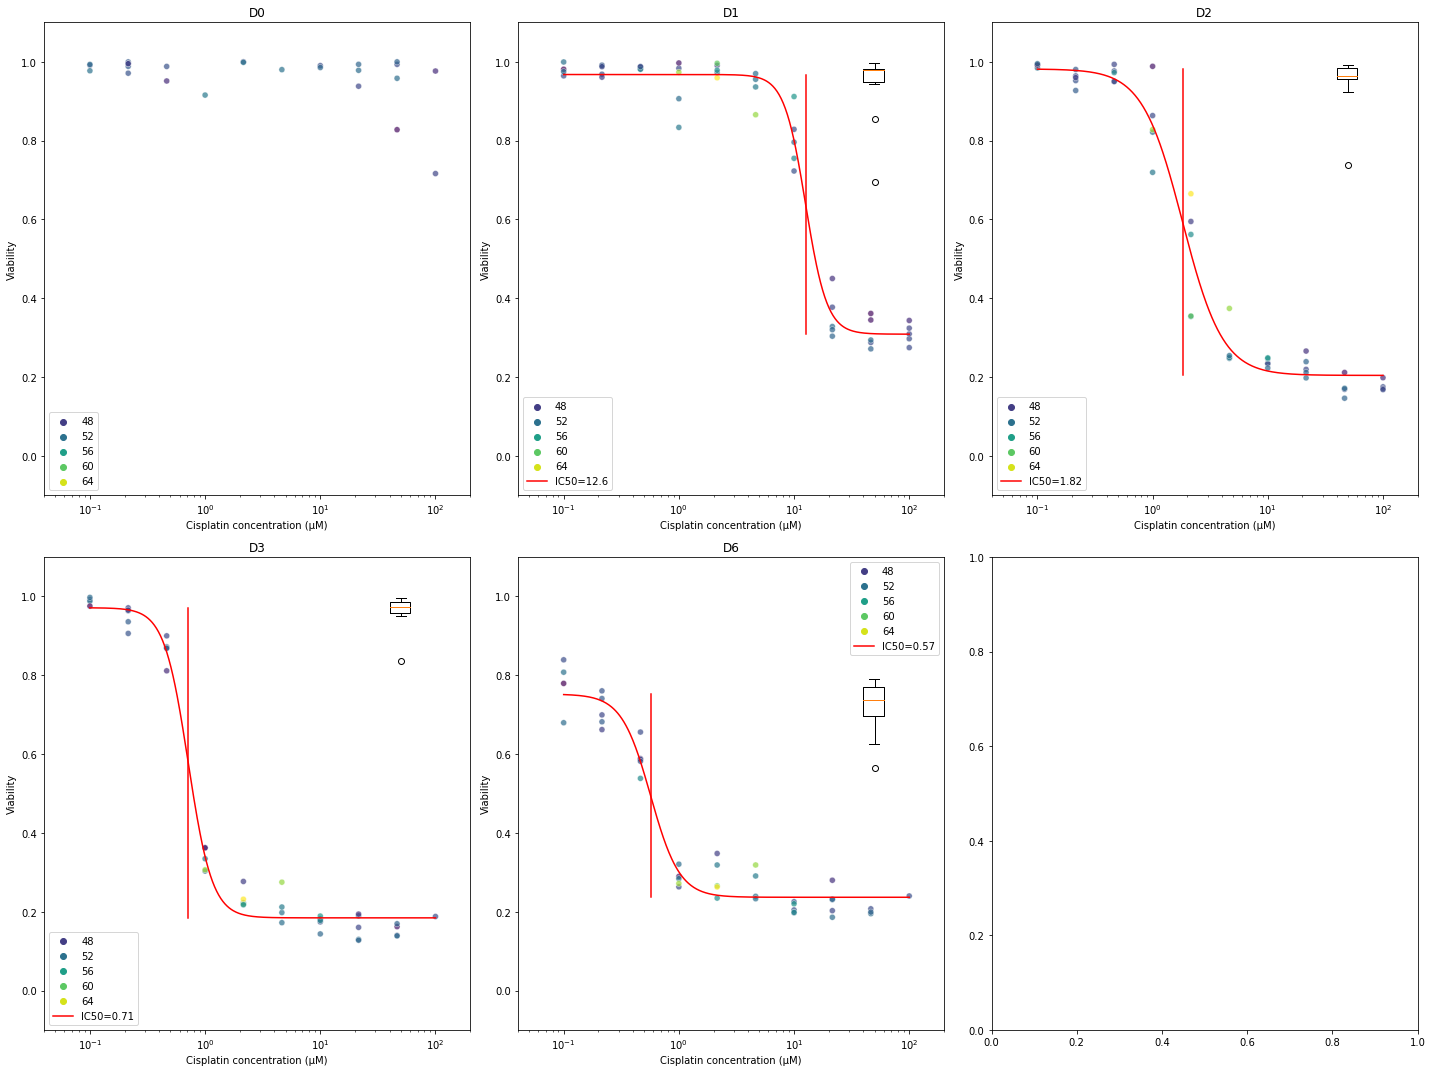

In [36]:
plot_Plate(dfCisPlat,drugName="CisPlat",xlab="Cisplatin concentration (µM)",
                  save=True,
                    fileName = "20221011_PlateCisplatin_withFitResult_excelFile",
                        printFit=True)

[0.98190427 1.82182971 5.72398113 0.20443518]


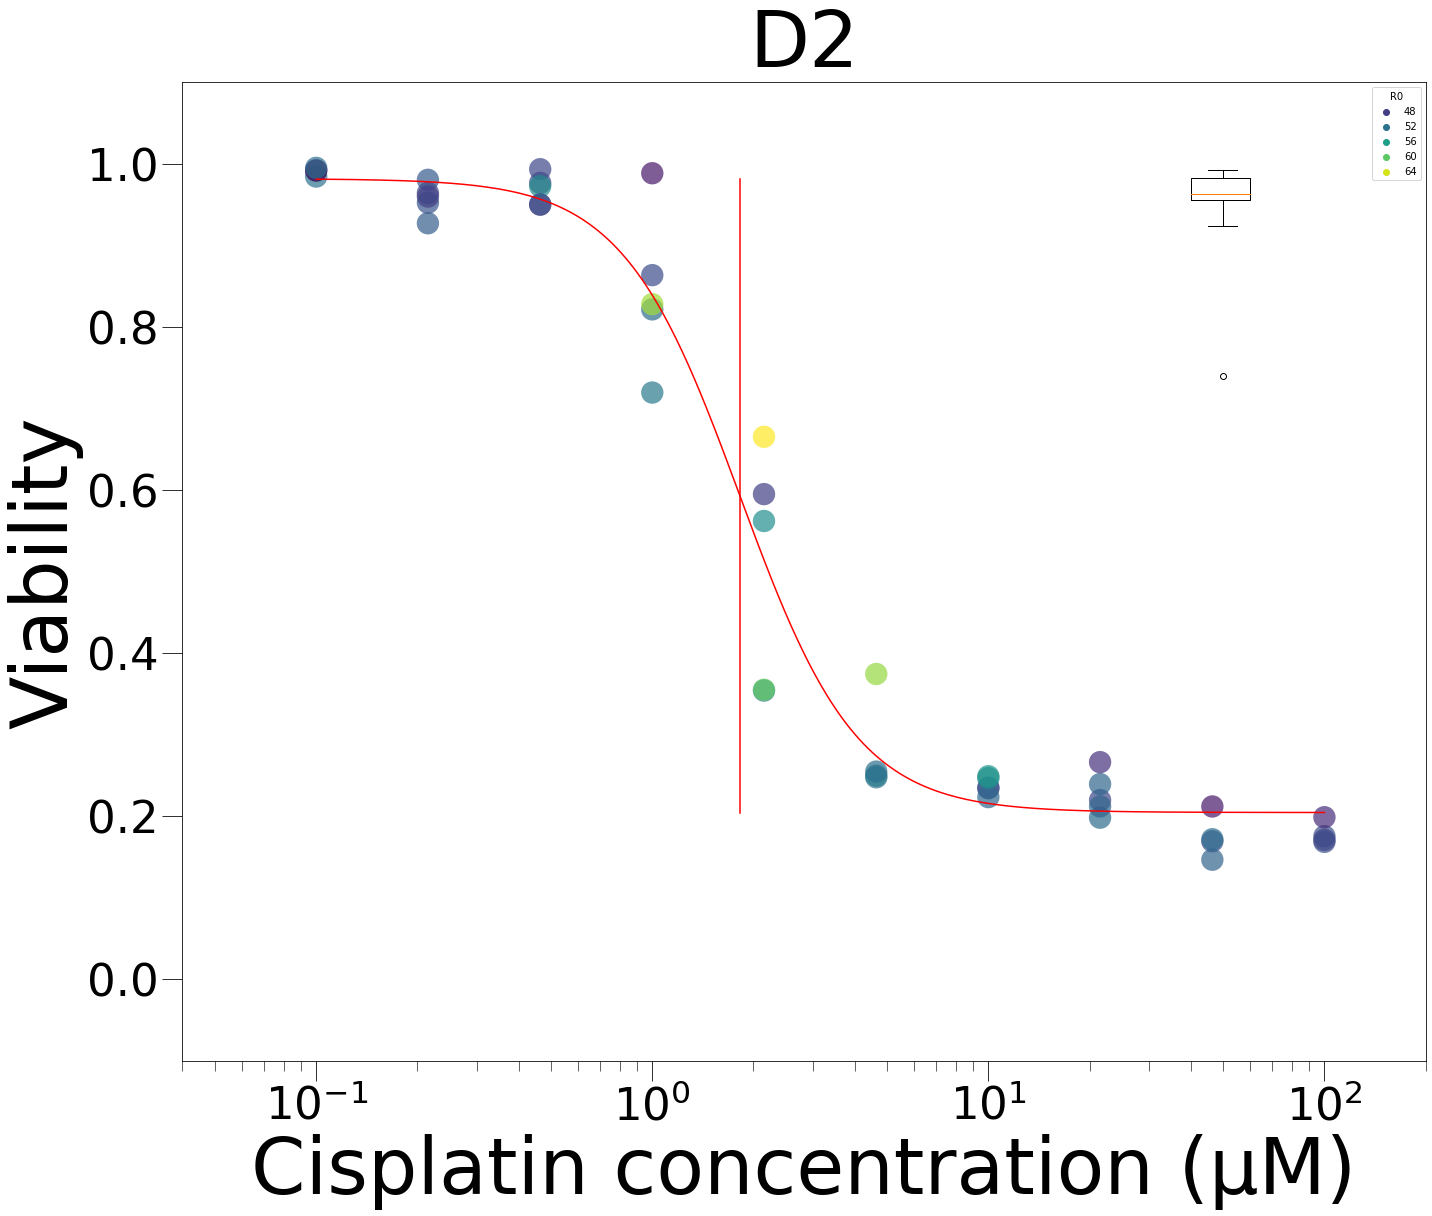

In [38]:
plot_PlateD2(dfCisPlat,drugName="CisPlat",xlab="Cisplatin concentration (µM)",
                  save=True,
                    fileName = "20221011_PlateCisplatin_D2only_withFitResult_fromExcel",
                        printFit=True)

[0.9959009  1.98215864 7.12552395 0.28777053]


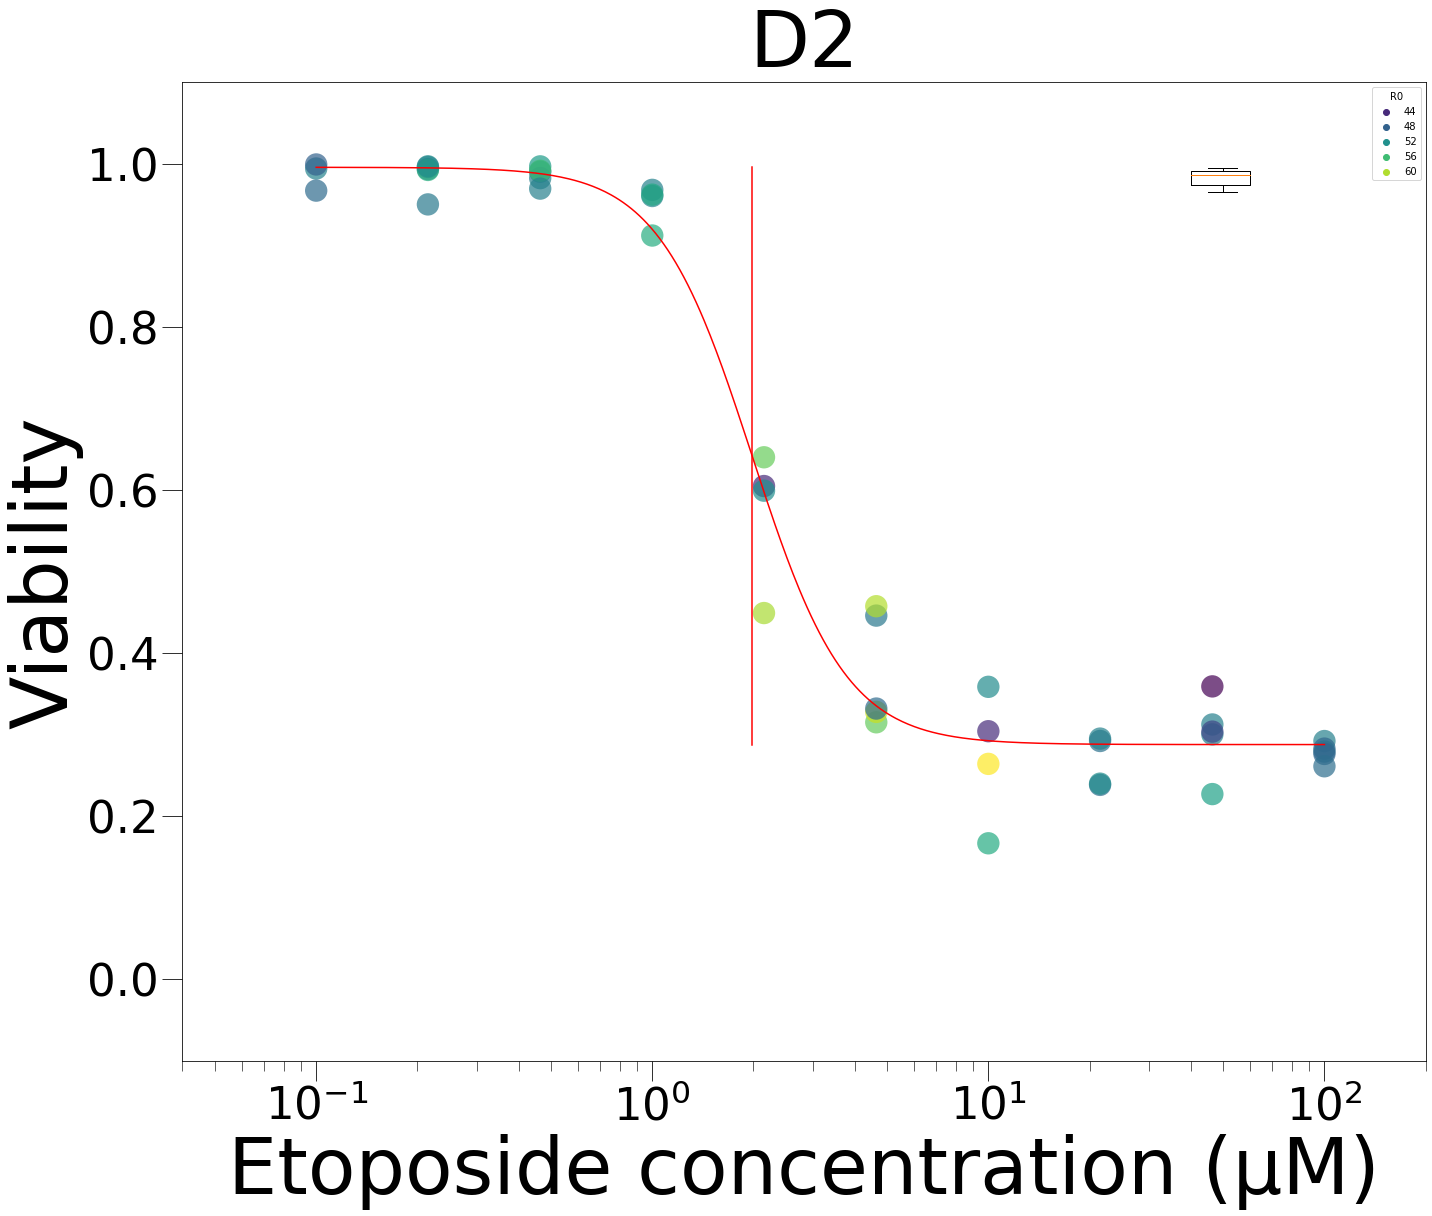

In [40]:
plot_PlateD2(dfEto,drugName="Eto",xlab="Etoposide concentration (µM)",
                  save=True,
                    fileName = "20221011_PlateEtoposide_D2only_withFitResult_fromExcel",
                        printFit=True)

In [41]:
# saving the analysis
dataToCSV(dfEto,name="20221011_PlateEto_fromExcel")
dataToCSV(dfCisPlat,name="20221011_PlateCisPlat_fromExcel")